## Malaria Parasite Detection Using CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
import warnings
warnings.filterwarnings("ignore")


2.15.0


In [2]:
img_width = 64
img_height = 64

In [3]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [4]:
Train_Data = datagen.flow_from_directory(directory='malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [5]:
Validation_Data = datagen.flow_from_directory(directory='malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [6]:
Train_Data.labels

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
Validation_Data.labels

array([0, 0, 0, ..., 1, 1, 1])

## CNN Model Building

In [8]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

## ADAM

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit_generator(generator=Train_Data,
                              steps_per_epoch = len(Train_Data),
                              epochs = 5,
                              validation_data = Validation_Data,
                              validation_steps = len(Validation_Data))


Epoch 1/5


1378/1378 [==============================] - 396s 284ms/step - loss: 0.5346 - accuracy: 0.7270 - val_loss: 0.2998 - val_accuracy: 0.9176
Epoch 2/5
1378/1378 [==============================] - 131s 95ms/step - loss: 0.2405 - accuracy: 0.9199 - val_loss: 0.1952 - val_accuracy: 0.9211
Epoch 3/5
1378/1378 [==============================] - 129s 94ms/step - loss: 0.1959 - accuracy: 0.9351 - val_loss: 0.2557 - val_accuracy: 0.9323
Epoch 4/5
1378/1378 [==============================] - 121s 88ms/step - loss: 0.1757 - accuracy: 0.9467 - val_loss: 0.1645 - val_accuracy: 0.9383
Epoch 5/5
1378/1378 [==============================] - 136s 98ms/step - loss: 0.1573 - accuracy: 0.9525 - val_loss: 0.1666 - val_accuracy: 0.9390


In [11]:
def plot_learningCurve(history, epoch):
    
#Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


#Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

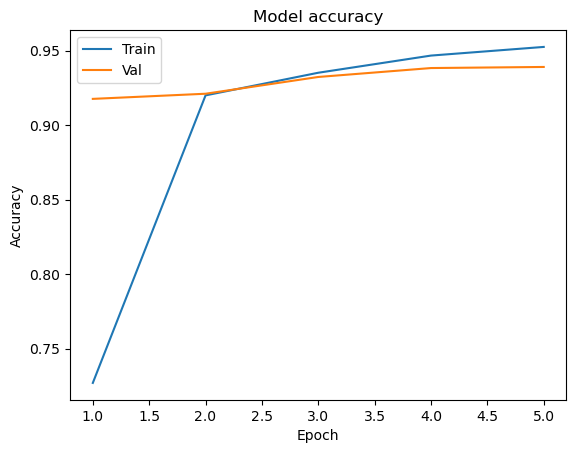

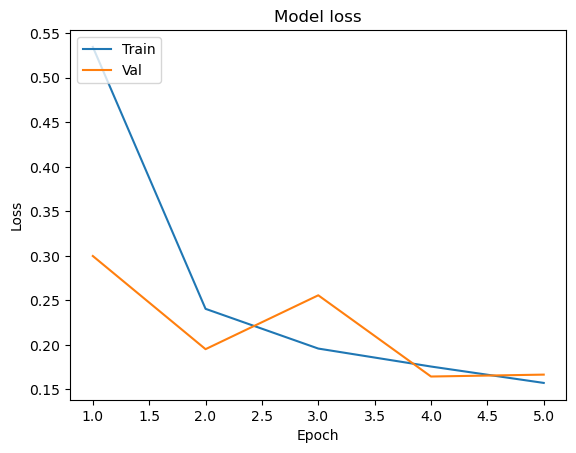

In [12]:
plot_learningCurve(history, 5)

### SGD (Stochastic Gradient Descent)

In [13]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(generator=Train_Data,
                              steps_per_epoch=len(Train_Data),
                              epochs=5,
                              validation_data=Validation_Data,
                              validation_steps=len(Validation_Data))

Epoch 1/5
1378/1378 [==============================] - 126s 90ms/step - loss: 0.1552 - accuracy: 0.9517 - val_loss: 0.1932 - val_accuracy: 0.9334
Epoch 2/5
1378/1378 [==============================] - 128s 93ms/step - loss: 0.1515 - accuracy: 0.9532 - val_loss: 0.1725 - val_accuracy: 0.9423
Epoch 3/5
1378/1378 [==============================] - 98s 71ms/step - loss: 0.1439 - accuracy: 0.9551 - val_loss: 0.1740 - val_accuracy: 0.9381
Epoch 4/5
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1414 - accuracy: 0.9557 - val_loss: 0.1952 - val_accuracy: 0.9336
Epoch 5/5
1378/1378 [==============================] - 90s 66ms/step - loss: 0.1419 - accuracy: 0.9561 - val_loss: 0.1802 - val_accuracy: 0.9405


### Adamax

In [14]:
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(generator=Train_Data,
                              steps_per_epoch=len(Train_Data),
                              epochs=5,
                              validation_data=Validation_Data,
                              validation_steps=len(Validation_Data))

Epoch 1/5
1378/1378 [==============================] - 110s 77ms/step - loss: 0.1339 - accuracy: 0.9576 - val_loss: 0.1799 - val_accuracy: 0.9412
Epoch 2/5
1378/1378 [==============================] - 105s 76ms/step - loss: 0.1336 - accuracy: 0.9571 - val_loss: 0.1820 - val_accuracy: 0.9403
Epoch 3/5
1378/1378 [==============================] - 101s 73ms/step - loss: 0.1331 - accuracy: 0.9593 - val_loss: 0.1886 - val_accuracy: 0.9405
Epoch 4/5
1378/1378 [==============================] - 107s 78ms/step - loss: 0.1292 - accuracy: 0.9594 - val_loss: 0.1970 - val_accuracy: 0.9368
Epoch 5/5
1378/1378 [==============================] - 110s 80ms/step - loss: 0.1298 - accuracy: 0.9593 - val_loss: 0.1807 - val_accuracy: 0.9410


## 1. Loss Curves

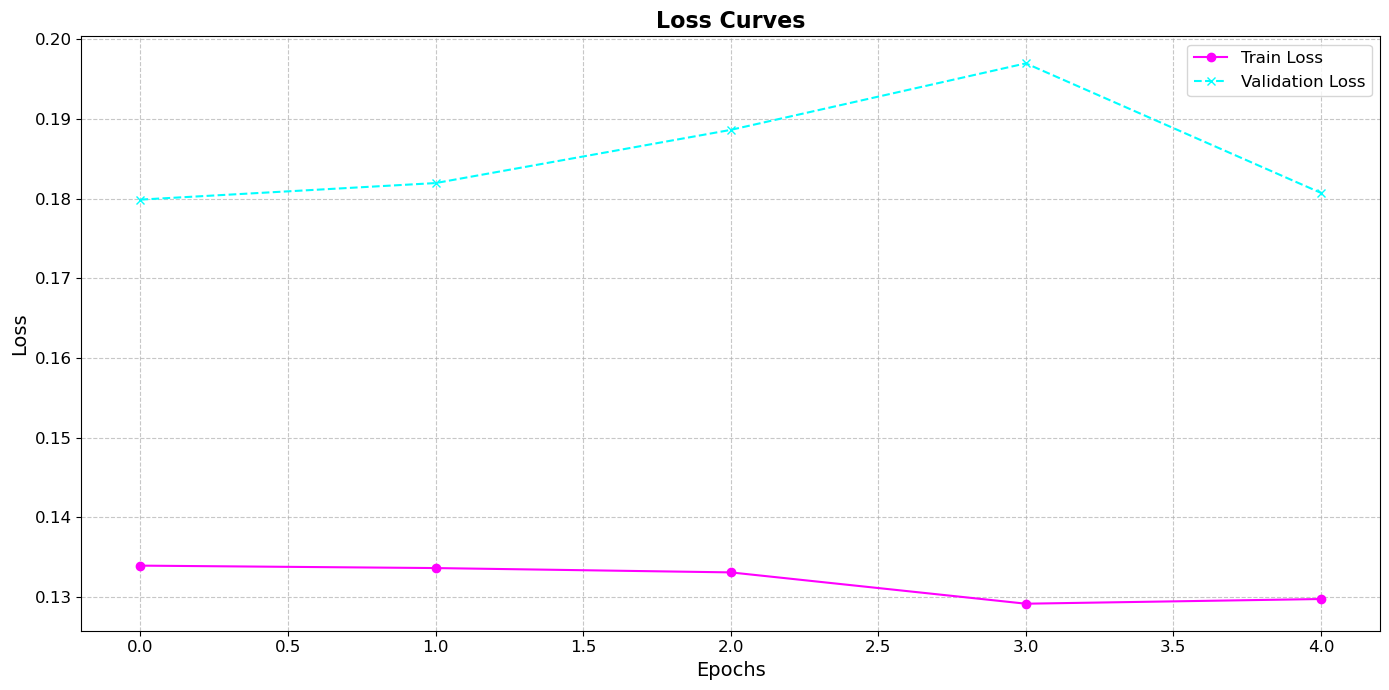

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss', linestyle='-', marker='o', color='magenta')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x', color='cyan')

plt.title('Loss Curves', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


## DONE